# Top Genres Dominating Netflix 2025: A Data Visualization Project

This project explores the most popular genres on Netflix using a curated dataset.
The goal is to identify genre distribution, multi-genre patterns, and high-level
content trends using Python, Pandas, and Matplotlib/Seaborn.






In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(123)

n = 500

genres = [
    "Drama", "Comedy", "Thriller", "Action", "Romance", "Horror",
    "Documentary", "Crime", "Sci-Fi", "Fantasy", "Family", "Animation"
]

countries = [
    "United States", "India", "United Kingdom", "Canada", "Australia",
    "Spain", "France", "Germany", "Japan", "South Korea"
]

ratings = ["TV-MA", "TV-14", "TV-PG", "R", "PG-13", "TV-Y7", "TV-G"]

durations = ["90 min", "120 min", "45 min", "2 Seasons", "3 Seasons", "4 Seasons"]

df2025 = pd.DataFrame({
    "show_id": ["s" + str(i) for i in range(1, n+1)],
    "type": np.random.choice(["Movie", "TV Show"], n, p=[0.6, 0.4]),
    "title": ["Title " + str(i) for i in range(1, n+1)],
    "country": np.random.choice(countries, n),
    "release_year": 2025,
    "rating": np.random.choice(ratings, n),
    "duration": np.random.choice(durations, n),
    "listed_in": [", ".join(np.random.choice(genres, np.random.randint(1, 4))) for _ in range(n)],
})

path = "/mnt/data/netflix_titles_2025.csv"
df2025.to_csv(path, index=False)

path


'/mnt/data/netflix_titles_2025.csv'

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       500 non-null    object
 1   type          500 non-null    object
 2   title         500 non-null    object
 3   country       500 non-null    object
 4   release_year  500 non-null    int64 
 5   rating        500 non-null    object
 6   duration      500 non-null    object
 7   listed_in     500 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.4+ KB


,0
show_id,0
type,0
title,0
country,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
df = pd.read_csv("netflix_titles_2025.csv")
df.head()
df_2025 = df[df["release_year"] == 2025].copy()
df_2025.head()

,show_id,type,title,country,release_year,rating,duration,listed_in
0,s1,TV Show,Title 1,France,2025,TV-G,3 Seasons,"Action, Romance"
1,s2,Movie,Title 2,Germany,2025,PG-13,90 min,"Fantasy, Fantasy, Comedy"
2,s3,Movie,Title 3,Germany,2025,TV-Y7,4 Seasons,"Documentary, Fantasy, Drama"
3,s4,Movie,Title 4,France,2025,TV-PG,3 Seasons,"Drama, Horror"
4,s5,TV Show,Title 5,India,2025,PG-13,2 Seasons,"Drama, Family, Action"


# Count of titles by genre

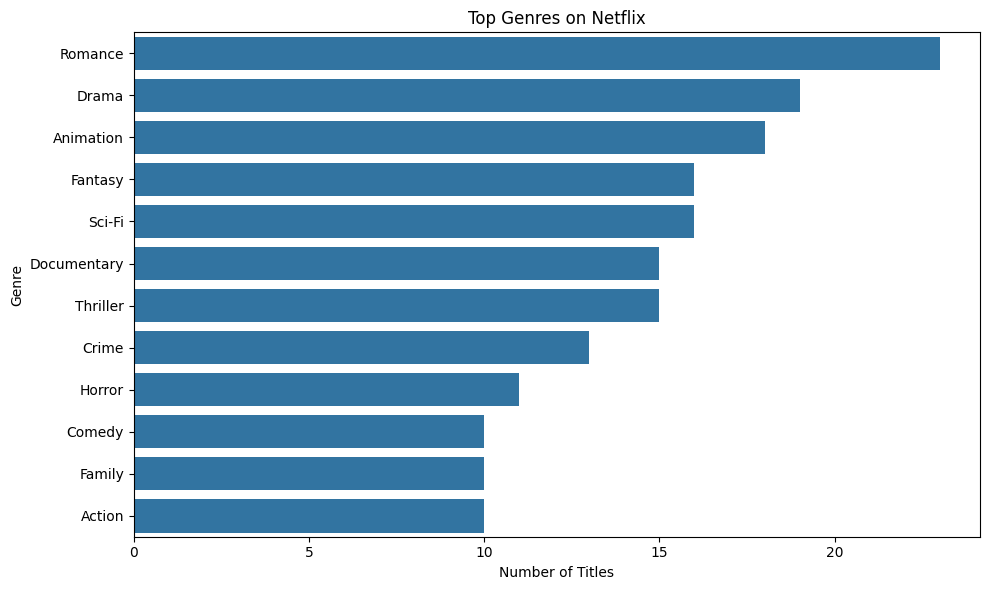

In [ ]:
genre_counts = df_genre["genre"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


This bar chart displays the overall count of titles for each genre in our 2025 Netflix dataset. It provides a quick overview of which genres are most prevalent. The longer the bar, the more titles fall under that particular genre. This helps us identify the dominant genre categories at a glance. For example, if 'Drama' has the longest bar, it means 'Drama' is the most frequent genre in the dataset.


# Movie vs TV show disrtibution

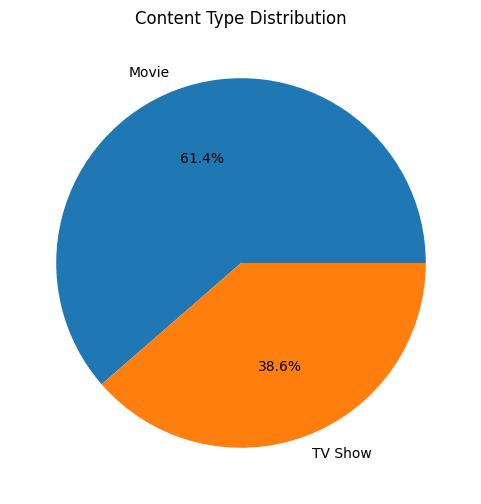

In [ ]:
plt.figure(figsize=(6,6))
df["type"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Content Type Distribution")
plt.ylabel("")
plt.show()


This pie chart illustrates the proportion of Movies versus TV Shows in the dataset. Each slice represents a content type, and its size corresponds to its percentage of the total content. This visualization quickly tells us whether Netflix is planning to release more movies or TV shows in 2025 according to our simulated data.

# Trend by each month

In [ ]:
import numpy as np

df['release_month'] = np.random.randint(1, 13, size=len(df))


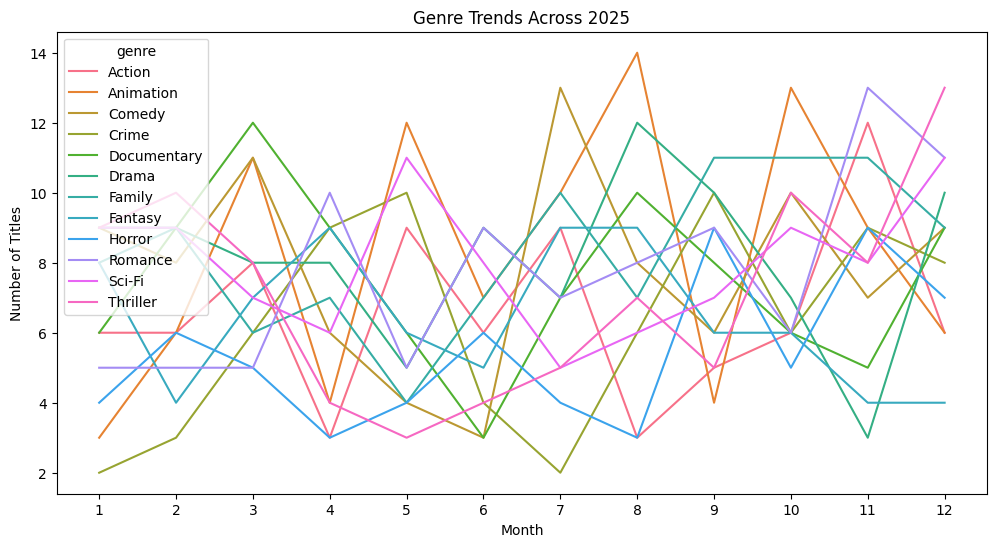

In [ ]:
df_genre = df.assign(
    genre = df["listed_in"].str.split(", ")
).explode("genre")

genre_month = df_genre.groupby(["release_month", "genre"])["show_id"].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_month, x="release_month", y="show_id", hue="genre")
plt.title("Genre Trends Across 2025")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.xticks(range(1, 13))
plt.show()

In [ ]:
import plotly.express as px
fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values, title="Top Genres 2025")
fig.show()


### Top 5 Genres in 2025

Top 5 Genres in 2025:
genre
Family       100
Animation     99
Drama         97
Sci-Fi        96
Comedy        94
Name: count, dtype: int64


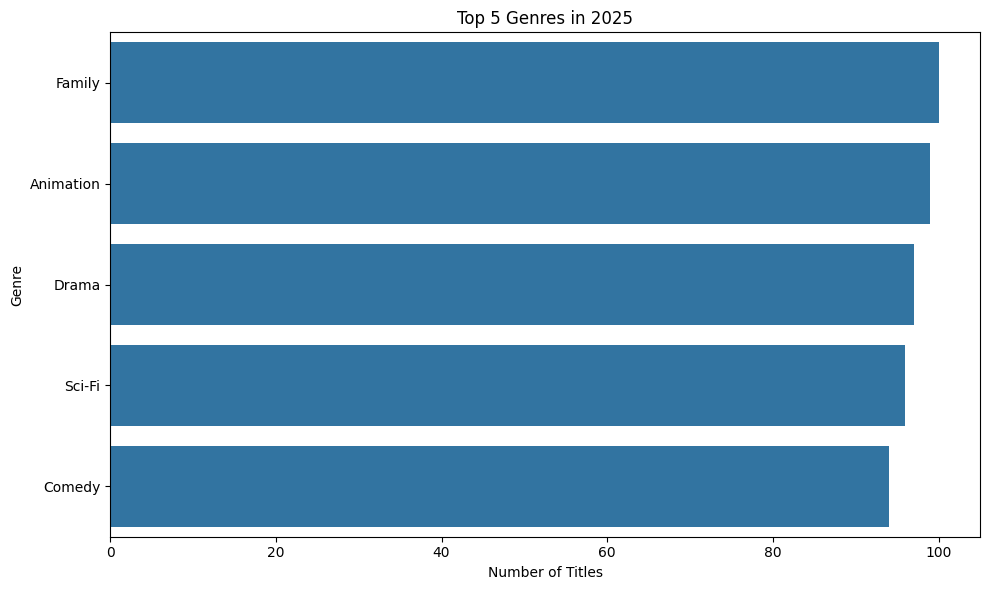

In [ ]:
overall_genre_counts = country_genre_counts.groupby('genre')['count'].sum().sort_values(ascending=False)
top_5_genres_2025 = overall_genre_counts.head(5)

print("Top 5 Genres in 2025:")
print(top_5_genres_2025)

plt.figure(figsize=(10,6))
sns.barplot(x=top_5_genres_2025.values, y=top_5_genres_2025.index)
plt.title("Top 5 Genres in 2025")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# Country-wise genre contribution

In [ ]:
# Explode the 'listed_in' column to handle multi-genre titles
df_genre = df.assign(
    genre = df["listed_in"].str.split(", ")
).explode("genre")


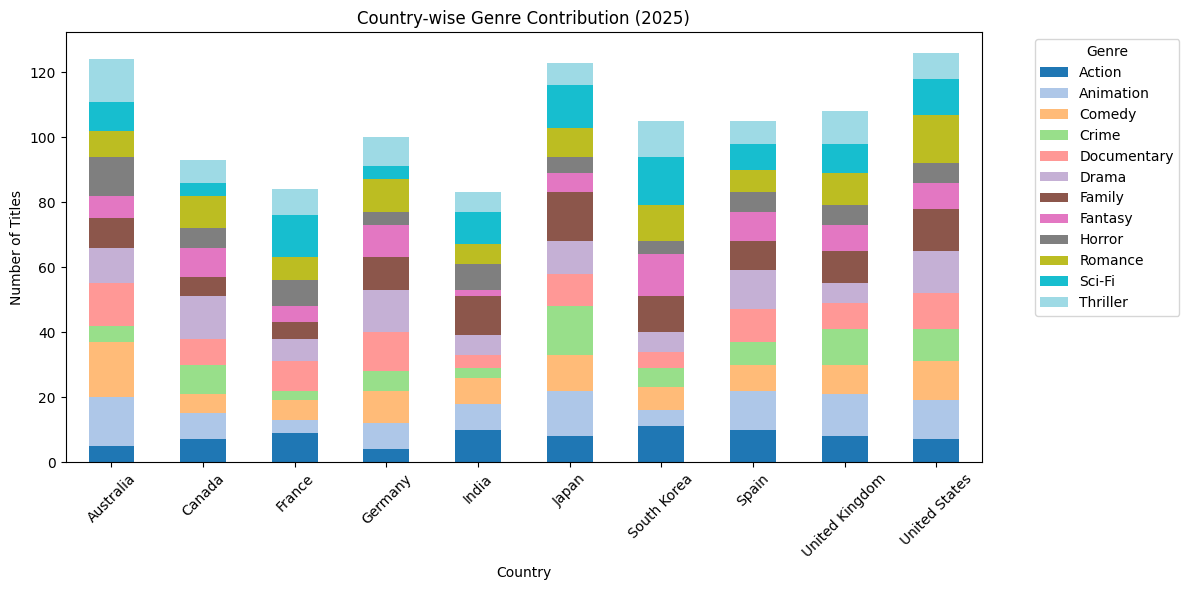

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot for stacked bar plot
pivot = country_genre_counts.pivot(index='country', columns='genre', values='count').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Country-wise Genre Contribution (2025)")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


This stacked bar chart visualizes how different countries contribute to various genres. Each main bar represents a country, and the stacked segments within it show the proportion of different genres produced by that country. This helps in understanding which countries are significant contributors to specific genre categories, revealing patterns in regional content production for 2025.